In [2]:
import onnx
# https://github.com/onnx/models/blob/main/vision/object_detection_segmentation/tiny-yolov2/model/tinyyolov2-8.tar.gz
onnx_model = onnx.load("data/tinyyolov2-8/Model/Model.onnx")
# check model validity https://github.com/onnx/onnx/blob/main/docs/PythonAPIOverview.md
try:
    onnx.checker.check_model(onnx_model)
except onnx.checker.ValidationError as e:
    print(f"The model is invalid: {e}")
else:
    print("The model is valid!")

onnx.save_model(onnx_model, 'saved_model.onnx', save_as_external_data=True, all_tensors_to_one_file=True, location='data/weights_data', size_threshold=1024, convert_attribute=False)

# load external data for model, if necessary
# load_external_data_form_model(onnx_model, "path/to/data")


The model is valid!


In [18]:
print(f"IR Version: {onnx_model.ir_version}")
print(f"Doc String: {onnx_model.doc_string}")
print(f"domain: {onnx_model.domain}")
print(f"functions: {onnx_model.functions}")
print(f"metadata: {onnx_model.metadata_props}")
meta = onnx_model.metadata_props.add()
meta.key = "biomodels:studyId"
meta.value = "BIO:121314"
print(onnx_model.metadata_props)


IR Version: 5
Doc String: The Tiny YOLO network from the paper 'YOLO9000: Better, Faster, Stronger' (2016), arXiv:1612.08242
domain: onnxconverter-common
functions: []
metadata: [key: "Image.BitmapPixelFormat"
value: "Rgb8"
, key: "author"
value: "Original paper: Joseph Redmon, Ali Farhadi"
, key: "license"
value: "Public Domain"
]
[key: "Image.BitmapPixelFormat"
value: "Rgb8"
, key: "author"
value: "Original paper: Joseph Redmon, Ali Farhadi"
, key: "license"
value: "Public Domain"
, key: "biomodels:studyId"
value: "BIO:121314"
]


In [5]:
!python onnx-venv/lib/python3.9/site-packages/onnx/tools/net_drawer.py --input saved_model.onnx --output model.dot --embed_docstring

In [6]:
!dot -Tsvg model.dot -o model.svg

In [4]:
from IPython.display import SVG, display
def show_svg():
    display(SVG("model.svg"))

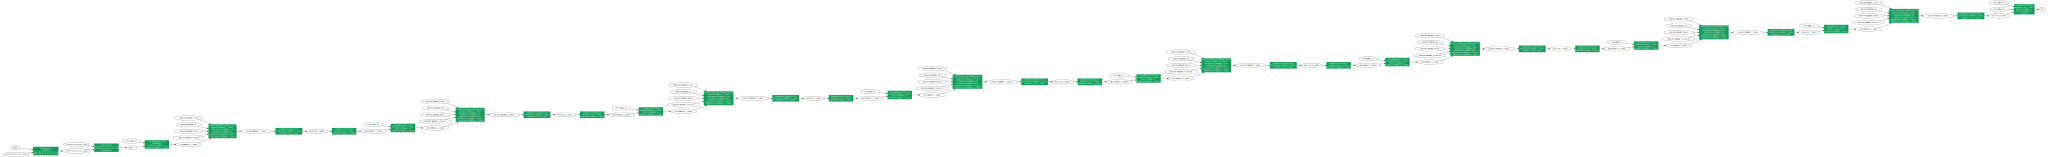

In [5]:
show_svg()